In [2]:
import pandas as pd
from dataclasses import asdict
from news_bmw_docx_read import yield_news_from_docx
import os

nm_list = list()

root = r'D:\Shared\test\bmw\nb_input\docs'
docx_paths = [os.path.join(root, f) for f in os.listdir(root) if f.lower().endswith('.docx')]

from ipywidgets import IntProgress
from IPython.display import display
pbar = IntProgress(min=0, max=len(docx_paths))
display(pbar)

for fp in docx_paths:
    nm_list.extend(yield_news_from_docx(
        fp, "{}-{}-{}".format(fp[:4], fp[4:6], fp[6:8])
    ))
    pbar.value += 1

data = pd.DataFrame([asdict(nm) for nm in nm_list])
data['label'] = data['category'].apply(lambda x: 0 if x=='PHL' else 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['doc'], data['label'], random_state=1)

IntProgress(value=0, max=659)

------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181015 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181018 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181022 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181023 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181024 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181025 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181026 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181029 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181030 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181031 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181105 BMW.docx ------
------ GETTING FROM DOCX D:\Shared\test\bmw\nb_input\docs\20181106 BMW FINAL.docx -----

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from news_nlp_lemma import tokenizer, token_stop
# cv = TfidfVectorizer(
#     strip_accents='ascii', token_pattern=u' (?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words=token_stop,
#     tokenizer=tokenizer
# )
cv = CountVectorizer(
    strip_accents='ascii', token_pattern=u' (?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words=token_stop,
    tokenizer=tokenizer
)

# X_train_cv = cv.fit_transform(X_train)
# X_test_cv = cv.transform(X_test)

word_freq_df = pd.DataFrame(cv.fit_transform(X_train).toarray(), columns = cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)
print(top_words_df)

from sklearn.naive_bayes import MultinomialNB
mnb = make_pipeline(cv, MultinomialNB())
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy score: ", accuracy_score(y_test, predictions)) # how many were correct
print("Precision score: ", precision_score(y_test, predictions)) # tp / (tp + fp)
print("Recall score: ", recall_score(y_test, predictions)) # tp / (tp + fn)

                 0
(            12199
)            12175
said         11493
philippine    5789
year          5368
...            ...
p0.5114/kwh      1
antidote         1
antigen          1
p0.4717          1
~~~us            1

[40354 rows x 1 columns]
Accuracy score:  0.9689922480620154
Precision score:  0.9736225087924971
Recall score:  0.9458997722095672


Text(0.5, 15.0, 'predicted label')

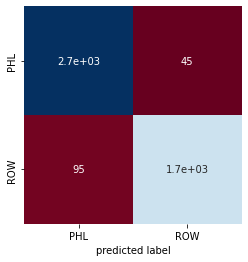

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(
    cm, square=True, annot=True, cmap='RdBu', cbar=False,
    xticklabels=['PHL', 'ROW'], yticklabels=['PHL', 'ROW']
)
plt.xlabel('true label')
plt.xlabel('predicted label')

In [23]:
# import pickle
# with open(r'mnb_bmw.pkl','wb') as f:
#     pickle.dump(mnb,f)
